In [1]:
import pandas as pd

In [100]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.metrics import confusion_matrix

In [2]:
reviews = pd.read_csv('google_review_ratings .csv')

In [3]:
reviews.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
reviews['Category 11']

0        1.7
1        1.7
2        1.7
3       1.73
4        1.7
        ... 
5451    1.02
5452    1.01
5453    0.99
5454    0.97
5455    0.95
Name: Category 11, Length: 5456, dtype: object

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5455 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

In [7]:
reviews = reviews.drop(columns = ['User','Unnamed: 25'])

In [8]:
reviews.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
reviews.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')

In [10]:
reviews.shape

(5456, 24)

In [16]:
reviews[reviews['Category 11'] == '2\t2.']

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
2712,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,...,5.0,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57


In [18]:
reviews = reviews.drop(index = 2712)

In [21]:
reviews['Category 11'] = pd.to_numeric(reviews['Category 11'])

In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 5455
Data columns (total 24 columns):
Category 1     5455 non-null float64
Category 2     5455 non-null float64
Category 3     5455 non-null float64
Category 4     5455 non-null float64
Category 5     5455 non-null float64
Category 6     5455 non-null float64
Category 7     5455 non-null float64
Category 8     5455 non-null float64
Category 9     5455 non-null float64
Category 10    5455 non-null float64
Category 11    5455 non-null float64
Category 12    5455 non-null float64
Category 13    5455 non-null float64
Category 14    5455 non-null float64
Category 15    5455 non-null float64
Category 16    5455 non-null float64
Category 17    5455 non-null float64
Category 18    5455 non-null float64
Category 19    5455 non-null float64
Category 20    5455 non-null float64
Category 21    5455 non-null float64
Category 22    5455 non-null float64
Category 23    5455 non-null float64
Category 24    5454 non-null float64
dtype

In [23]:
reviews['overall_rating'] = reviews.sum(axis =1)/24

In [25]:
reviews['Enrolled'] = reviews['overall_rating'].map(lambda x:'No' if x<=2.0 else "Yes" )

In [62]:
reviews['Enrolled'].value_counts()

Yes    2859
No     2596
Name: Enrolled, dtype: int64

In [27]:
reviews.isna().sum()

Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       0
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
overall_rating    0
Enrolled          0
dtype: int64

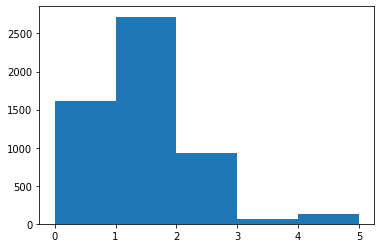

In [31]:
plt.hist(reviews['Category 1'], bins = 5);

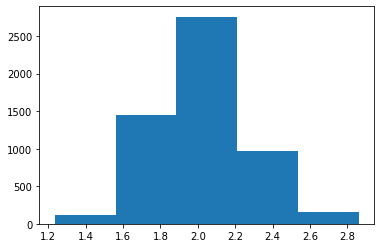

In [33]:
plt.hist(reviews['overall_rating'], bins = 5);

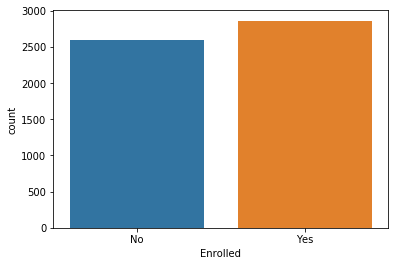

In [38]:
sns.countplot(reviews['Enrolled']);

In [64]:
reviews = reviews.drop(columns= ['overall_rating'])

In [79]:
estimators = {
    'Knn' : KNeighborsClassifier(n_neighbors=5),
    "RandomForest" : RandomForestClassifier(n_estimators = 100,max_depth = 10),
    'GaussianNB' : GaussianNB(),
    'Decision_Tree' : DecisionTreeClassifier(max_depth = 10),
    'Logistic' : LogisticRegression()
}

In [80]:
trainX,testX,trainY,testY = train_test_split(reviews.drop(columns= ['Enrolled']), reviews.Enrolled)

In [101]:
for algo, estimator in estimators.items():
    pipeline = make_pipeline(SimpleImputer(strategy = 'median'),estimator)
    pipeline.fit(trainX,trainY)
    print('Training accuracy of ', algo, ':', np.round(pipeline.score(trainX,trainY),2))
    print('Testing accuracy of ', algo, ':',np.round(pipeline.score(testX,testY),2))
    con_mat= confusion_matrix(y_pred = pipeline.predict(testX),y_true = testY)
    print(con_mat)
    print('*'*40)

Training accuracy of  Knn : 0.94
Testing accuracy of  Knn : 0.9
[[571  43]
 [ 93 657]]
****************************************
Training accuracy of  RandomForest : 0.98
Testing accuracy of  RandomForest : 0.87
[[546  68]
 [106 644]]
****************************************
Training accuracy of  GaussianNB : 0.71
Testing accuracy of  GaussianNB : 0.68
[[534  80]
 [359 391]]
****************************************
Training accuracy of  Decision_Tree : 0.97
Testing accuracy of  Decision_Tree : 0.84
[[508 106]
 [116 634]]
****************************************
Training accuracy of  Logistic : 0.97
Testing accuracy of  Logistic : 0.97
[[597  17]
 [ 28 722]]
****************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


it seems like RandomForest and Decision are have tendency to over fit

### Hyper parameter tuning for RandomForest

In [84]:
pipeline = make_pipeline(SimpleImputer(strategy = 'median'), SelectKBest(score_func = f_classif, k =10)
                         , RandomForestClassifier(n_estimators = 100, max_depth = 10))

In [93]:
params = {'selectkbest__k': [10,15,20,24], 'randomforestclassifier__n_estimators':[100,200,500,1000],
          'randomforestclassifier__max_depth':[10,15,20]}

In [94]:
gs = GridSearchCV(pipeline, param_grid= params, cv =5 ,n_jobs = 4)

In [95]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('selectkbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000000DC843A3D38>)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bo...
                                                               n

In [96]:
gs.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 500,
 'selectkbest__k': 24}

In [97]:
gs.best_score_

0.8966022977267172

In [98]:
gs.score(trainX,trainY)

1.0

In [99]:
gs.score(testX,testY)

0.8812316715542522

Even with best parameters Randomforest is overfitting , hence it is not a recommnded modelfor this problem

* the best model is LogisticRegression with both training and testing accuracies as 0.97